In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import cv2

In [2]:
#Creating a Function.
def Npdf(x , mean , sd):
    prob_density = (1/(np.sqrt (2*np.pi)*sd)) * np.exp(-0.5*((x-mean)/sd)**2)
    return prob_density

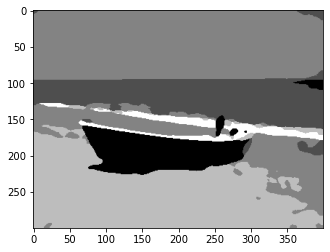

In [8]:
I = cv2.imread('im25.jpg')
I = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)
I=I.astype(float)
nf,nc=I.shape
N=nf*nc
I=I.ravel()
K=5
sz=9
m=I[random.choices(np.arange(N),k=K)]
m=np.array([50,100,130,160,200])
std=(np.ones(K,)*3)
gamma=np.zeros((N,K))
temp=np.zeros((nf,nc))
plt.hist(I.ravel(),256,[0,256],density=True);
for ite in range(20):
    for k in range(K):
        gamma[:,k]=Npdf(I , m[k] , std[k])
        temp=cv2.GaussianBlur(gamma[:,k].reshape(nf,nc),(sz,sz),cv2.BORDER_DEFAULT)
        gamma[:,k]=temp.ravel()
    assig=np.argmax(gamma+1e-50,axis=1)
    for k in range(K):
        m[k]=np.sum(I[assig==k])/np.sum(assig==k)
        std[k]=np.sqrt(np.sum((I[assig==k]-m[k])**2)/np.sum(assig==k))


for k in range(K):
    gamma[:,k]=Npdf(I , m[k] , std[k])
    temp=cv2.GaussianBlur(gamma[:,k].reshape(nf,nc),(sz,sz),cv2.BORDER_DEFAULT)
    gamma[:,k]=temp.ravel()
assig=np.argmax(gamma,axis=1)
Iseg=I*1
for k in range(K):
    Iseg[assig==k]=m[k]
Iseg=Iseg.reshape(nf,nc)
plt.imshow(Iseg, cmap='gray')